# Problem sheet 4

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.table as t

## Ex. 1

In [2]:
seed=1234
covar2=np.loadtxt('xi_plus_covariance.dat')
random=np.random.default_rng(seed)

generate data vectors

In [3]:
Ndraws=50
random_data=random.multivariate_normal(np.zeros(covar2.shape[0]),covar2,size=Ndraws)
mean_estim=np.mean(random_data,axis=0)
covar2_estim=np.mean(random_data[:,:,np.newaxis]*random_data[:,np.newaxis,:],axis=0)        #data is mean free

In [4]:
np.diag(covar2).shape

(15,)

### plot input covar

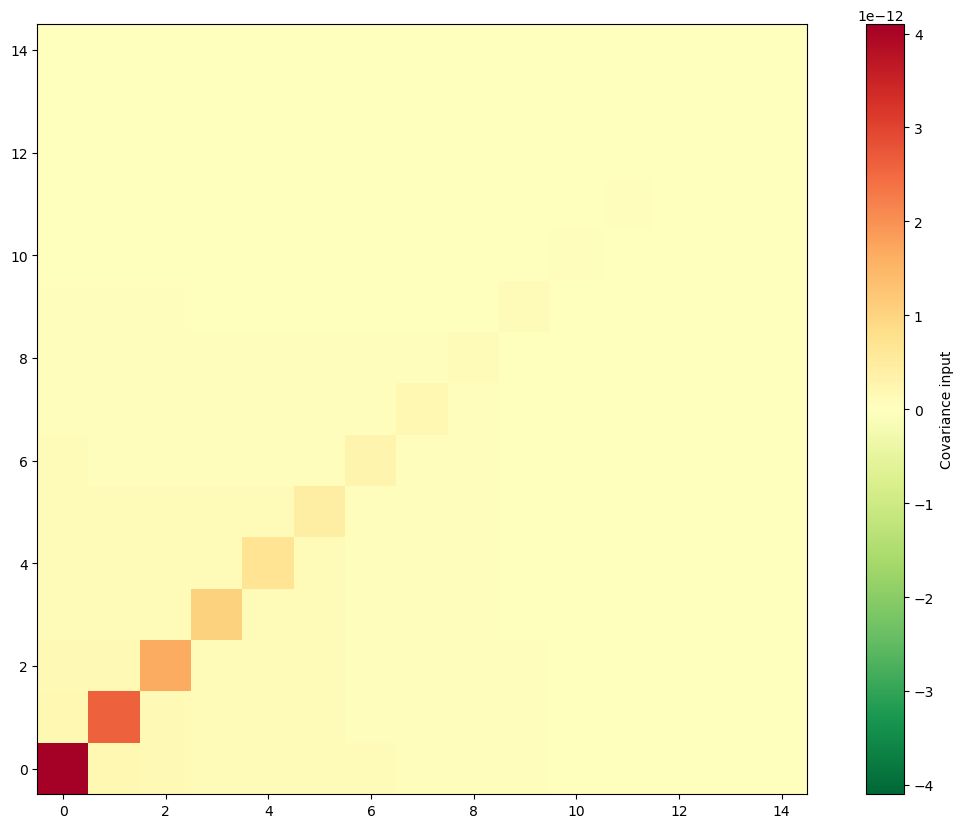

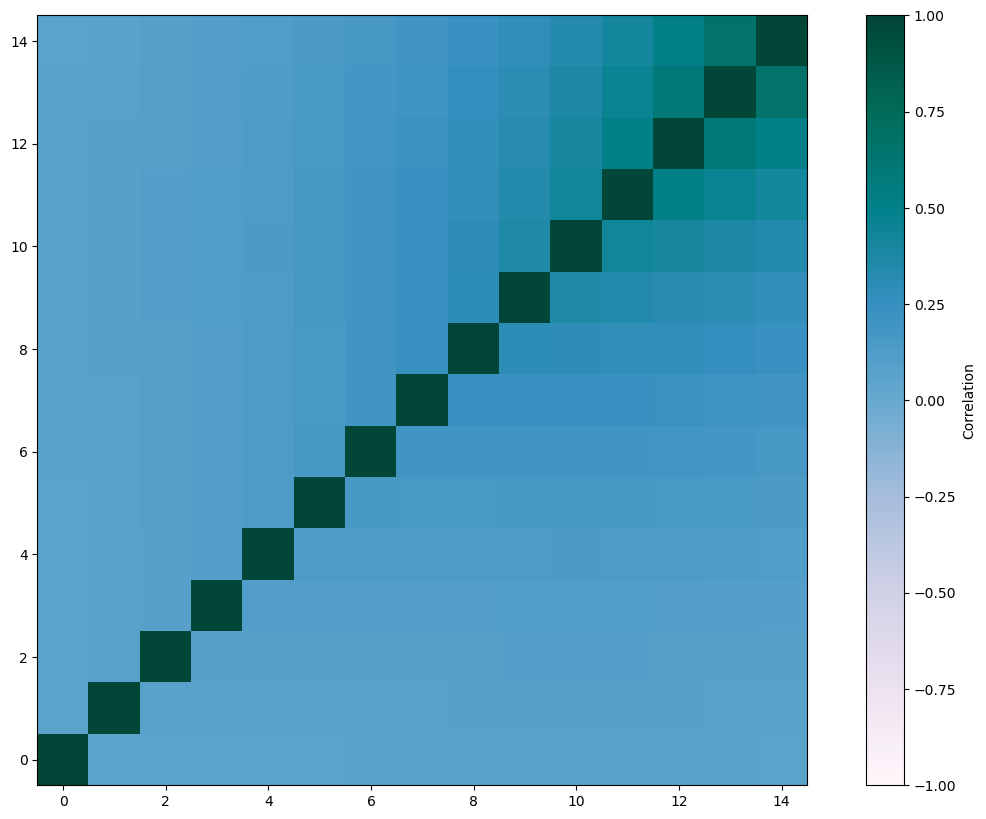

In [5]:
plt.figure(figsize=(15,10))
plt.imshow(covar2,vmin=-np.max(np.abs(covar2)),vmax=np.max(np.abs(covar2)),cmap='RdYlGn_r',origin='lower')
cbar=plt.colorbar()
cbar.set_label('Covariance input')

corr2=np.einsum('i,ij,j->ij',1/np.sqrt(np.diag(covar2)),covar2,1/np.sqrt(np.diag(covar2)))

plt.figure(figsize=(15,10))
plt.imshow(corr2,vmin=-1,vmax=1,cmap='PuBuGn',origin='lower')
cbar=plt.colorbar()
cbar.set_label('Correlation')

### plot covar estimate from random realizations

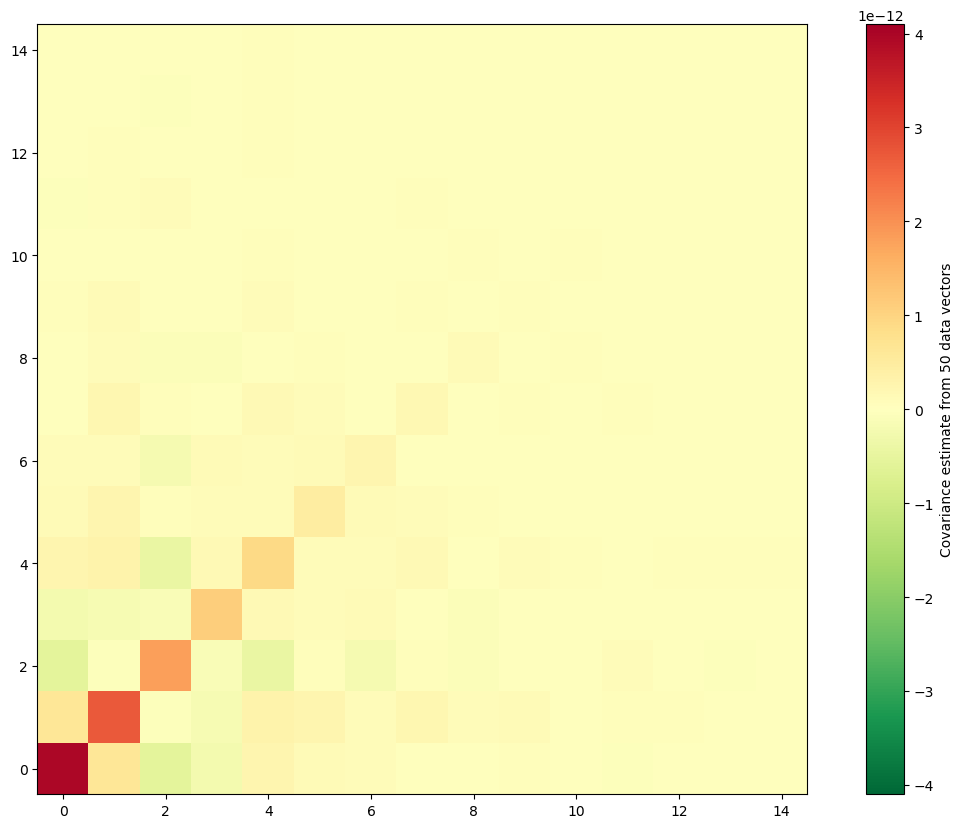

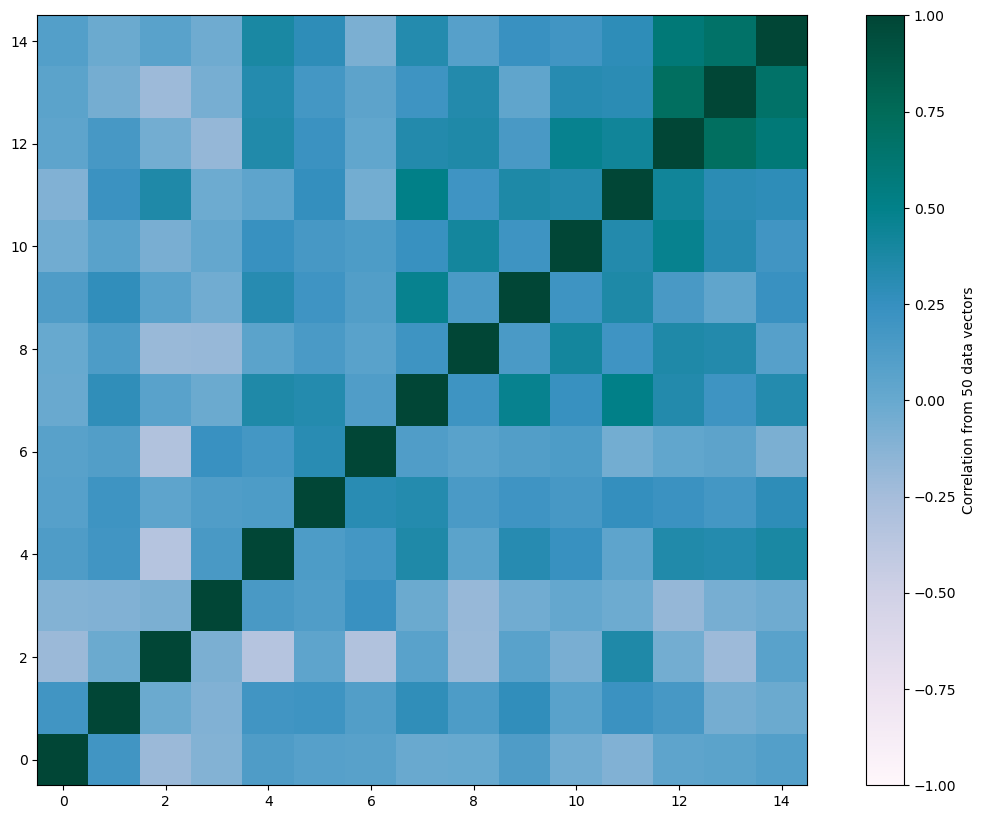

In [6]:
plt.figure(figsize=(15,10))
plt.imshow(covar2_estim,vmin=-np.max(np.abs(covar2)),vmax=np.max(np.abs(covar2)),cmap='RdYlGn_r',origin='lower')

cbar=plt.colorbar()
cbar.set_label('Covariance estimate from 50 data vectors')


corr2_estim=np.einsum('i,ij,j->ij',1/np.sqrt(np.diag(covar2_estim)),covar2_estim,1/np.sqrt(np.diag(covar2_estim)))

plt.figure(figsize=(15,10))
plt.imshow(corr2_estim,vmin=-1,vmax=1,cmap='PuBuGn',origin='lower')
cbar=plt.colorbar()
cbar.set_label('Correlation from 50 data vectors')

plot the difference

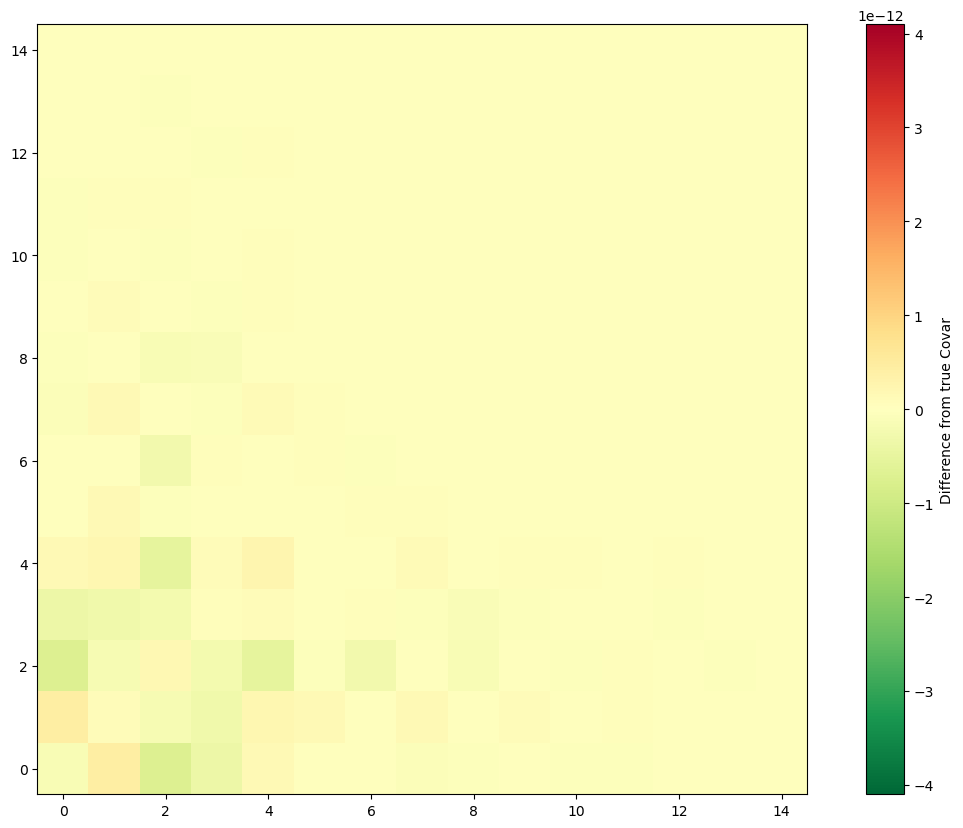

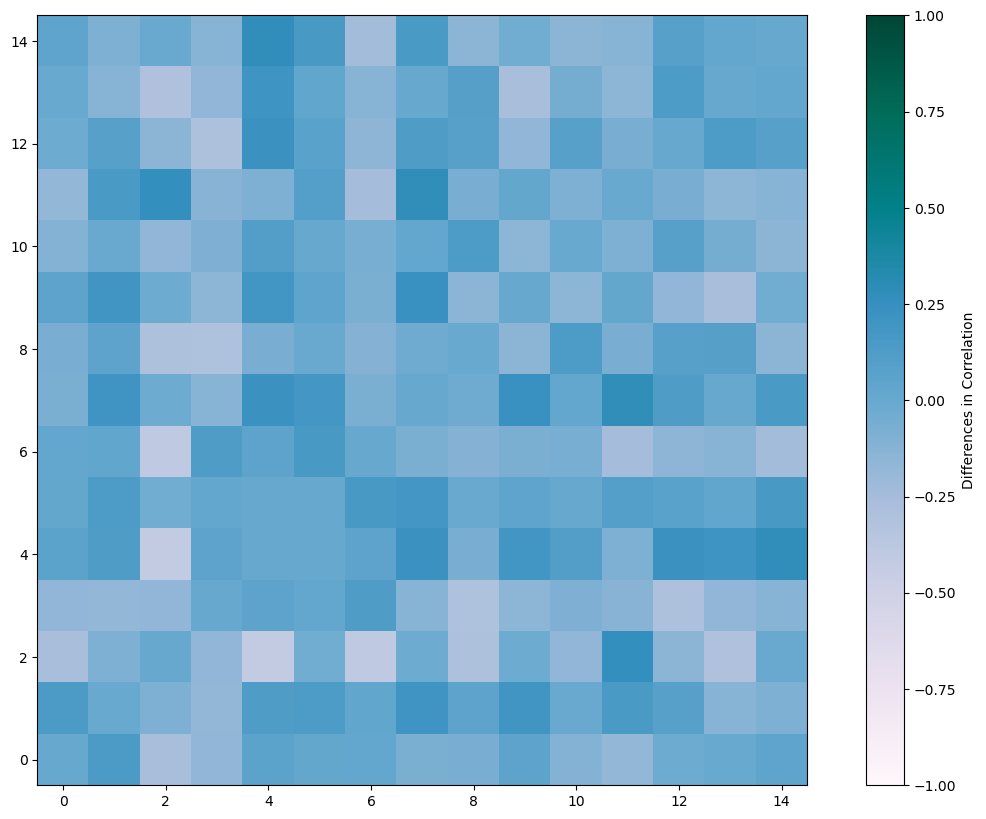

In [7]:
plt.figure(figsize=(15,10))
plt.imshow(covar2_estim-covar2,vmin=-np.max(np.abs(covar2)),vmax=np.max(np.abs(covar2)),cmap='RdYlGn_r',origin='lower')

corr2_estim=np.einsum('i,ij,j->ij',1/np.sqrt(np.diag(covar2_estim)),covar2_estim,1/np.sqrt(np.diag(covar2_estim)))


cbar=plt.colorbar()
cbar.set_label('Difference from true Covar')

plt.figure(figsize=(15,10))
plt.imshow(corr2_estim-corr2,vmin=-1,vmax=1,cmap='PuBuGn',origin='lower')
cbar=plt.colorbar()
cbar.set_label('Differences in Correlation')

### Invert the true covariance to get precision matrix and multiply with noisy covariance to get A matrix 

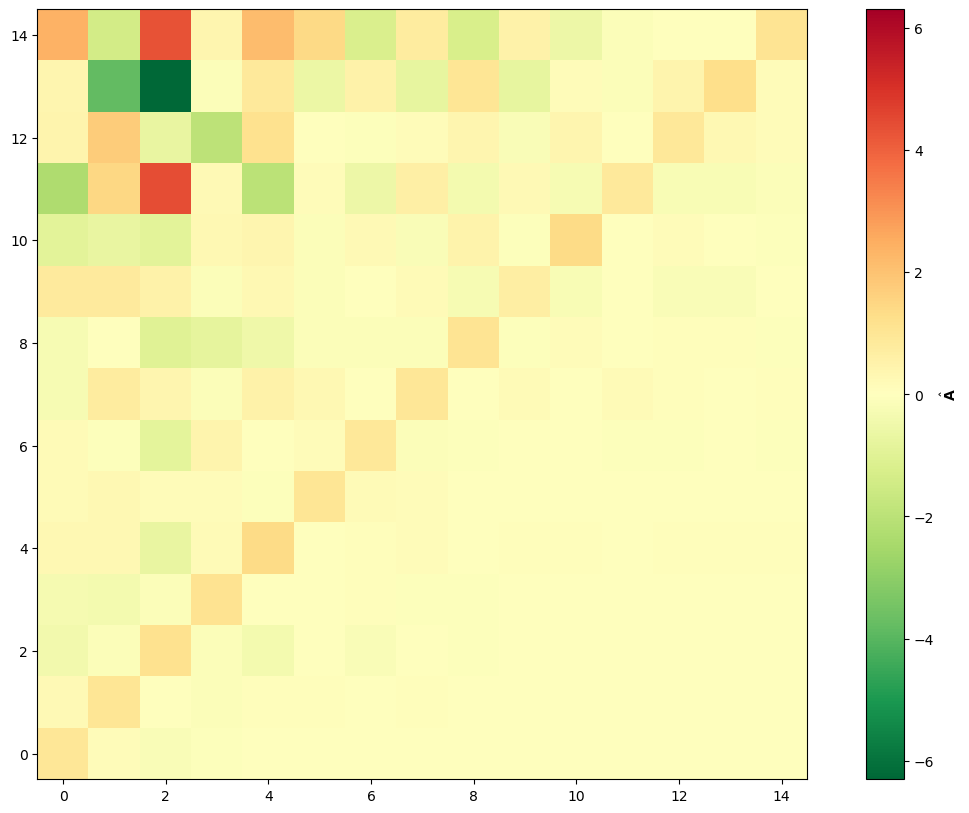

In [8]:
invcov2=np.linalg.inv(covar2)
A_matrix=invcov2@covar2_estim

plt.figure(figsize=(15,10))
plt.imshow(A_matrix,vmin=-np.max(np.abs(A_matrix)),vmax=np.max(np.abs(A_matrix)),cmap='RdYlGn_r',origin='lower')

cbar=plt.colorbar()
cbar.set_label(r'$\hat{\mathbf{A}}$')

compute uncertainty in the trace estimate from 1000 sets of 50 random draws

In [9]:
random_data_arr=np.random.multivariate_normal(np.zeros(covar2.shape[0]),covar2,size=(Ndraws,1000))
mean_estim_arr=np.mean(random_data_arr,axis=0)
covar2_estim_arr=np.mean(random_data_arr[...,np.newaxis]*random_data_arr[...,np.newaxis,:],axis=0)        #data is mean free
invcov2=np.linalg.inv(covar2)
A_matrix_arr=invcov2@covar2_estim_arr

In [10]:
A_matrix_std=np.std(A_matrix_arr,axis=0)

In [11]:
trace_mean=np.mean([np.trace(A) for A in A_matrix_arr])
trace_err=np.std([np.trace(A) for A in A_matrix_arr])
trace_err_on_mean=trace_err/np.sqrt(100)

In [12]:
print(f"Trace = {trace_mean:.2f} +- {trace_err_on_mean:.2f}")

Trace = 15.00 +- 0.08


### invert the "noisy" covariance and multiply with true covariance to get the B-matrix

In [13]:
invcov2_estim=np.linalg.inv(covar2_estim)
B_matrix=invcov2_estim@covar2

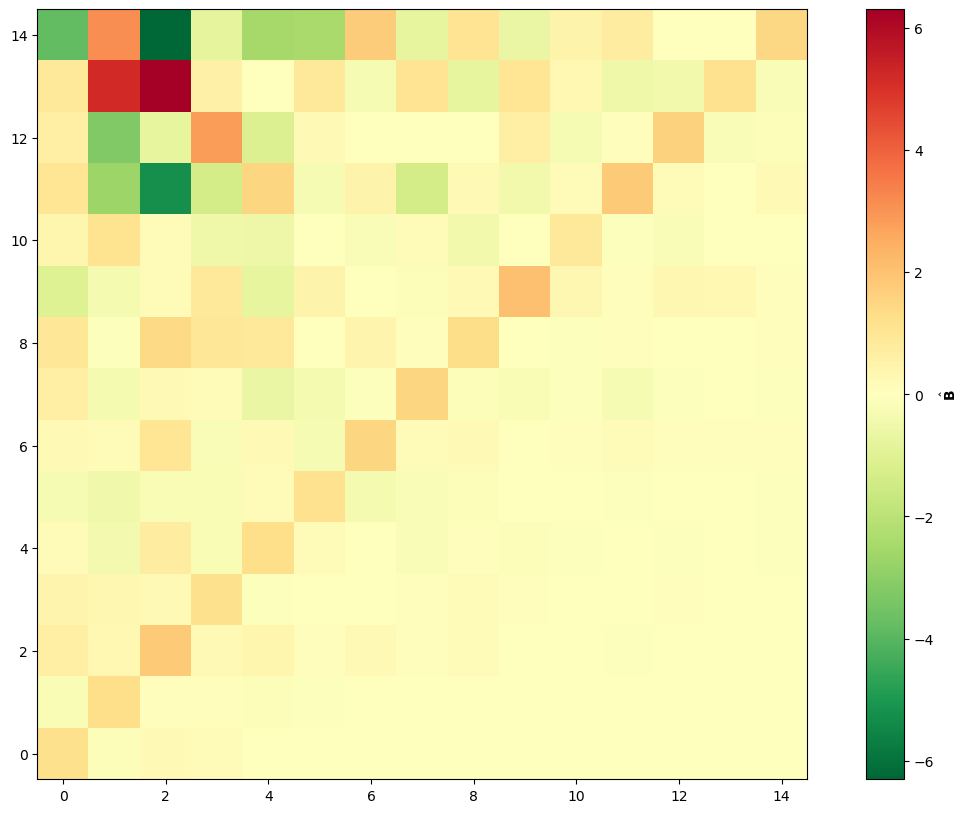

In [14]:
plt.figure(figsize=(15,10))
plt.imshow(B_matrix,vmin=-np.max(np.abs(A_matrix)),vmax=np.max(np.abs(A_matrix)),cmap='RdYlGn_r',origin='lower')

cbar=plt.colorbar()
cbar.set_label(r'$\hat{\mathbf{B}}$')

compute the trace

In [15]:
np.sum(np.diag(B_matrix))

21.079151829734805

relative bias of the trace

In [16]:
np.trace(B_matrix)/15

1.405276788648987

compute uncertainty in the trace estimate from 1000 sets of 50 random draws

In [17]:
random_data_arr=np.random.multivariate_normal(np.zeros(covar2.shape[0]),covar2,size=(Ndraws,1000))
mean_estim_arr=np.mean(random_data_arr,axis=0)
covar2_estim_arr=np.mean(random_data_arr[...,np.newaxis]*random_data_arr[...,np.newaxis,:],axis=0)        #data is mean free
invcov2_estim_arr=np.linalg.inv(covar2_estim_arr)
A_matrix_arr=invcov2_estim_arr@covar2

In [18]:
A_matrix_std=np.std(A_matrix_arr,axis=0)

In [19]:
trace_mean=np.mean([np.trace(A) for A in A_matrix_arr])
trace_err=np.std([np.trace(A) for A in A_matrix_arr])
trace_err_on_mean=trace_err/np.sqrt(100)

In [20]:
print(f"Trace = {trace_mean:.2f} +- {trace_err_on_mean:.2f} >> 15")

Trace = 22.03 +- 0.17 >> 15


Reason for trace being too high: $\hat{\psi}$ based on samples is a biased estimator of the true $C^{-1}$ 

Inverting a matrix is not a linear operation (same as inverting a scalar isn't linear), so $C^{-1} = <\hat{C}>^{-1} \neq <\hat{C}^{-1}>$

## Ex. 2

In [21]:
seed=1234
random=np.random.default_rng(seed)

generate data vectors

In [22]:
mu_model=lambda alpha: alpha**3
alpha_best=lambda dhat: dhat**(1/3)
sigma=0.5
sig_alpha_best=lambda dhat: 1/3*dhat**(-2/3)*sigma
Ndata=1#0000
Nscientists=100000

In [23]:
def get_conf_int(p,grid):
    argsort_post=np.argsort(p)   #sort by posterior probability, makes evaluation easier
    cumsum=np.cumsum(p[argsort_post])/np.sum(p)   #for this part actually a normalization that normalizes the sum of all evaluated probabilities to 1 is more suitable
    in_confidence_region = cumsum>=0.317 #this discards the lowest posterior probability points until a total of 31.7% of the probability is reached
    d_in_confidence = [argsort_post[in_confidence_region]]
    d_in_confidence.sort()
    return np.min(grid[d_in_confidence]),np.max(grid[d_in_confidence])

In [24]:
alpha_grid=np.linspace(-3,3,1001)

In [25]:
post=lambda d,m,s: 1/np.sqrt(2*np.pi*s**2)*np.exp(-0.5*((d-m)/s)**2)

## $\alpha=0$

In [26]:
true_alpha=0
true_mean=mu_model(true_alpha)
random_data=random.normal(true_mean,sigma,size=(Nscientists,Ndata))
best_a=alpha_best(np.mean(random_data,axis=-1))

/scratch-local/slurm-job-tmp-496628/ipykernel_419/2264903311.py:2: RuntimeWarning: invalid value encountered in power
  alpha_best=lambda dhat: dhat**(1/3)


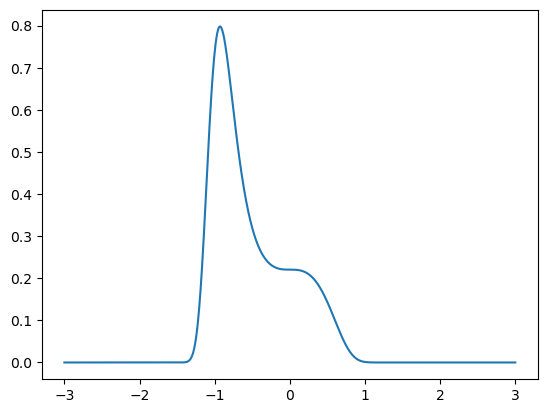

In [27]:
posterior=post(random_data[:,0,np.newaxis],mu_model(alpha_grid[np.newaxis,:]),sigma)
plt.plot(alpha_grid,posterior[0])

In [28]:
conv_intervals=[get_conf_int(p,alpha_grid) for p in posterior]

In [29]:
in_interval=[(true_alpha<c[1])&(true_alpha>c[0]) for c in conv_intervals]

In [30]:
print(f"truth is in interval {np.sum(in_interval)/Nscientists*100}% of the time")

truth is in interval 76.417% of the time


## $\alpha=1$

In [31]:
true_alpha=1
true_mean=mu_model(true_alpha)
random_data=random.normal(true_mean,sigma,size=(Nscientists,Ndata))
best_a=alpha_best(np.mean(random_data,axis=-1))

/scratch-local/slurm-job-tmp-496628/ipykernel_419/2264903311.py:2: RuntimeWarning: invalid value encountered in power
  alpha_best=lambda dhat: dhat**(1/3)


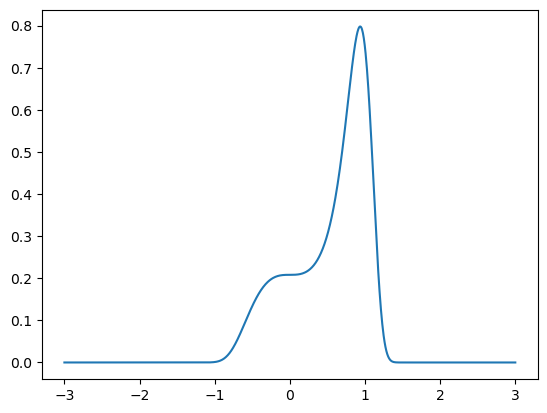

In [32]:
posterior=post(random_data[:,0,np.newaxis],mu_model(alpha_grid[np.newaxis,:]),sigma)
plt.plot(alpha_grid,posterior[0])

In [33]:
def get_conf_int(p,grid):
    argsort_post=np.argsort(p)   #sort by posterior probability, makes evaluation easier
    cumsum=np.cumsum(p[argsort_post])/np.sum(p)   #for this part actually a normalization that normalizes the sum of all evaluated probabilities to 1 is more suitable
    in_confidence_region = cumsum>=0.317 #this discards the lowest posterior probability points until a total of 31.7% of the probability is reached
    d_in_confidence = [argsort_post[in_confidence_region]]
    d_in_confidence.sort()
    return np.min(grid[d_in_confidence]),np.max(grid[d_in_confidence])

In [34]:
conv_intervals=[get_conf_int(p,alpha_grid) for p in posterior]

In [35]:
in_interval=[(true_alpha<c[1])&(true_alpha>c[0]) for c in conv_intervals]

In [36]:
print(f"truth is in interval {np.sum(in_interval)/Nscientists*100}% of the time")

truth is in interval 70.42% of the time


## Interesting facts about covariances

### When noisy covariance estimates can be useful

- no analytical covariance available $\Rightarrow$ need to compute numerically
- cross-check if measured covariance in the data is similar to expectation
- calculating $C^{-1}$ through e.g. precision matrix expansion

### Criteria to judge covariance estimates

- is a reasonable goodness of fit (measured by e.g. $\chi^2$) obtained using the covariance
- are the obtained parameter constraints reasonable when using the covariance
- is there an optical similarity between the measured covariance and a covariance model or other measurements

### Does every multi-variate distribution have a covariance matrix

No, and not even every univariate distribution has a variance, example: 

Cauchy-Lorentz distribution $f(x)=\frac{1}{1+x^2}$

$$Mean(f)=\int_{-\infty}^\infty f(x) x dx = \int_{-\infty}^\infty x/(1+x^2) dx = 0.5 \ln(x^2+1)|_{-\infty}^\infty $$
ill defined

$$Var(f)=\int f(x) x^2 dx - Mean(f)^2 = \int (1-\frac{1}{1+x^2}) dx - Mean(x)^2 = x|_{-\infty}^{\infty} - \arctan(x)|_{-\infty}^{\infty} - Mean(x)^2$$
first term becomes infinite, second is $\pi$ (so <X^2> is infinite), last term is ill defined, so variance is ill defined for the distribution.